# Imports

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

/Users/noelkronenberg/Library/CloudStorage/ProtonDrive-suafis@protonmail.com/Domains/Education/HU Berlin/Visual Analytics/001_EDA/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
import corr_utils.ml as ml_utils

# Data Acquisition

In [5]:
df_target = pd.read_csv('lucas_organic_carbon/target/lucas_organic_carbon_target.csv')

In [6]:
df_training = pd.read_csv('lucas_organic_carbon/training_test/lucas_organic_carbon_training_and_test_data.csv')

In [7]:
df_combined = pd.merge(df_training, df_target, left_index=True, right_index=True)

# EDA

## Raw Data

In [8]:
df_target.head()

,x
0,very_low
1,very_low
2,very_low
3,moderate
4,low


In [9]:
df_training.head()

,500.0,500.5,501.0,501.5,502.0,502.5,503.0,503.5,504.0,504.5,...,2495.0,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5
0,0.000276,0.000278,0.000280,0.000281,0.000283,0.000284,0.000286,0.000288,0.000289,0.000291,...,-0.000070,-0.000068,-0.000065,-0.000063,-0.000060,-0.000058,-0.000056,-0.000053,-0.000051,-0.000048
1,0.000351,0.000353,0.000355,0.000357,0.000358,0.000360,0.000362,0.000364,0.000366,0.000368,...,-0.000041,-0.000038,-0.000036,-0.000034,-0.000031,-0.000029,-0.000026,-0.000024,-0.000022,-0.000019
2,0.000330,0.000331,0.000333,0.000335,0.000337,0.000339,0.000341,0.000343,0.000344,0.000346,...,-0.000086,-0.000084,-0.000081,-0.000079,-0.000076,-0.000074,-0.000072,-0.000069,-0.000067,-0.000064
3,0.000300,0.000303,0.000305,0.000307,0.000309,0.000312,0.000314,0.000316,0.000318,0.000320,...,-0.000109,-0.000105,-0.000100,-0.000096,-0.000092,-0.000088,-0.000084,-0.000080,-0.000076,-0.000072
4,0.000388,0.000390,0.000391,0.000393,0.000395,0.000397,0.000399,0.000401,0.000403,0.000405,...,-0.000076,-0.000074,-0.000072,-0.000070,-0.000067,-0.000065,-0.000063,-0.000061,-0.000059,-0.000057


In [10]:
df_combined.head()

,500.0,500.5,501.0,501.5,502.0,502.5,503.0,503.5,504.0,504.5,...,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5,x
0,0.000276,0.000278,0.000280,0.000281,0.000283,0.000284,0.000286,0.000288,0.000289,0.000291,...,-0.000068,-0.000065,-0.000063,-0.000060,-0.000058,-0.000056,-0.000053,-0.000051,-0.000048,very_low
1,0.000351,0.000353,0.000355,0.000357,0.000358,0.000360,0.000362,0.000364,0.000366,0.000368,...,-0.000038,-0.000036,-0.000034,-0.000031,-0.000029,-0.000026,-0.000024,-0.000022,-0.000019,very_low
2,0.000330,0.000331,0.000333,0.000335,0.000337,0.000339,0.000341,0.000343,0.000344,0.000346,...,-0.000084,-0.000081,-0.000079,-0.000076,-0.000074,-0.000072,-0.000069,-0.000067,-0.000064,very_low
3,0.000300,0.000303,0.000305,0.000307,0.000309,0.000312,0.000314,0.000316,0.000318,0.000320,...,-0.000105,-0.000100,-0.000096,-0.000092,-0.000088,-0.000084,-0.000080,-0.000076,-0.000072,moderate
4,0.000388,0.000390,0.000391,0.000393,0.000395,0.000397,0.000399,0.000401,0.000403,0.000405,...,-0.000074,-0.000072,-0.000070,-0.000067,-0.000065,-0.000063,-0.000061,-0.000059,-0.000057,low


In [11]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9895 entries, 0 to 9894
Columns: 4001 entries, 500.0 to x
dtypes: float64(4000), object(1)
memory usage: 302.0+ MB


In [12]:
df_combined.isnull().sum()

500.0     0
500.5     0
501.0     0
501.5     0
502.0     0
         ..
2498.0    0
2498.5    0
2499.0    0
2499.5    0
x         0
Length: 4001, dtype: int64

In [13]:
df_combined.describe()

,500.0,500.5,501.0,501.5,502.0,502.5,503.0,503.5,504.0,504.5,...,2495.0,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5
count,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,...,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000
mean,0.000318,0.000320,0.000322,0.000323,0.000325,0.000327,0.000329,0.000331,0.000333,0.000335,...,-0.000085,-0.000082,-0.000079,-0.000076,-0.000073,-0.000070,-0.000067,-0.000064,-0.000061,-0.000058
std,0.000130,0.000131,0.000132,0.000132,0.000133,0.000134,0.000134,0.000135,0.000136,0.000136,...,0.000047,0.000046,0.000046,0.000045,0.000045,0.000044,0.000044,0.000044,0.000043,0.000043
min,0.000016,0.000016,0.000016,0.000017,0.000017,0.000017,0.000017,0.000018,0.000018,0.000018,...,-0.000558,-0.000557,-0.000556,-0.000555,-0.000554,-0.000554,-0.000553,-0.000552,-0.000551,-0.000550
25%,0.000221,0.000223,0.000224,0.000226,0.000227,0.000229,0.000230,0.000231,0.000233,0.000234,...,-0.000110,-0.000107,-0.000104,-0.000100,-0.000097,-0.000094,-0.000091,-0.000088,-0.000085,-0.000082
50%,0.000310,0.000312,0.000314,0.000316,0.000318,0.000320,0.000321,0.000323,0.000325,0.000327,...,-0.000077,-0.000074,-0.000071,-0.000068,-0.000065,-0.000062,-0.000059,-0.000056,-0.000053,-0.000050
75%,0.000408,0.000410,0.000412,0.000415,0.000417,0.000419,0.000422,0.000424,0.000426,0.000429,...,-0.000051,-0.000049,-0.000046,-0.000043,-0.000040,-0.000038,-0.000035,-0.000032,-0.000029,-0.000026
max,0.000876,0.000881,0.000887,0.000892,0.000897,0.000902,0.000907,0.000912,0.000917,0.000923,...,0.000033,0.000035,0.000039,0.000043,0.000047,0.000051,0.000055,0.000060,0.000064,0.000068


## Aggregated Data

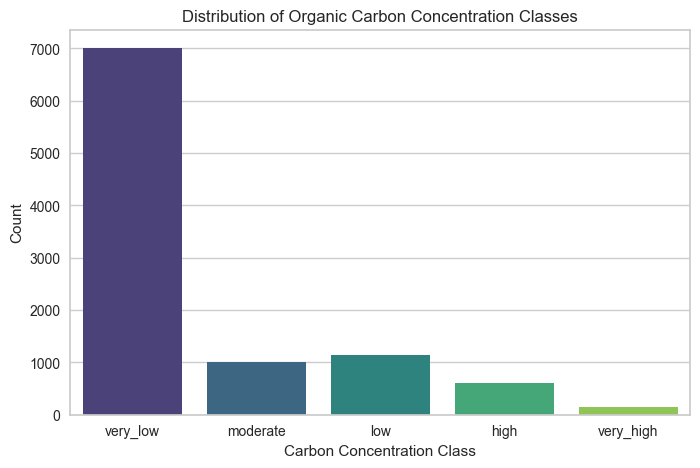

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='x', data=df_combined, palette='viridis', hue='x')
plt.title('Distribution of Organic Carbon Concentration Classes')
plt.xlabel('Carbon Concentration Class')
plt.ylabel('Count')
plt.show()

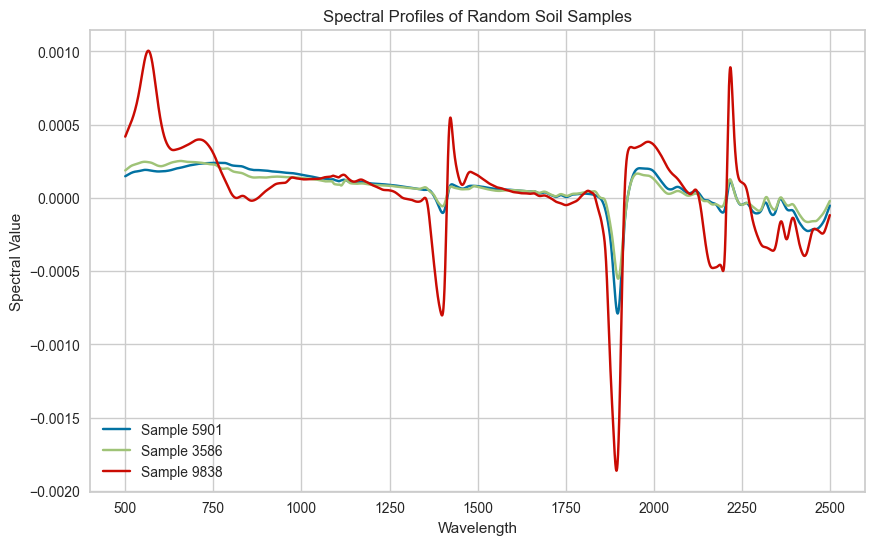

In [22]:
sample_spectral_profiles = df_combined.sample(3).drop(columns=['x'])

plt.figure(figsize=(10, 6))
for idx, row in sample_spectral_profiles.iterrows():
    plt.plot(row.index.astype(float), row.values, label=f'Sample {idx}')

plt.title('Spectral Profiles of Random Soil Samples')
plt.xlabel('Wavelength')
plt.ylabel('Spectral Value')
plt.legend()
plt.show()

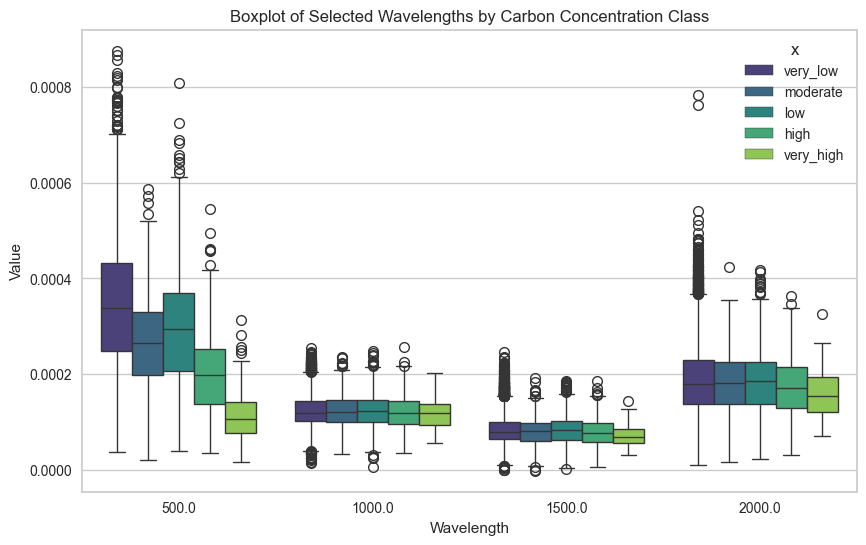

In [ ]:
selected_wavelengths = ['500.0', '1000.0', '1500.0', '2000.0'] # example wavelengths
df_melted = df_combined.melt(id_vars='x', value_vars=selected_wavelengths, var_name='Wavelength', value_name='Value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Wavelength', y='Value', hue='x', data=df_melted, palette='viridis')
plt.title('Boxplot of Selected Wavelengths by Carbon Concentration Class')
plt.show()

## Report

In [23]:
profile = ProfileReport(df_combined, title="Profiling Report", minimal=True)

In [ ]:
profile.to_notebook_iframe()

# Prediction (AutoML)

In [25]:
from pycaret.regression import *

In [27]:
df = df_combined  
reg_setup = setup(data=df, target='x', session_id=42, normalize=True)

,Description,Value
0,Session id,123
1,Target,x
2,Target type,Regression
3,Original data shape,"(9895, 4001)"
4,Transformed data shape,"(9895, 4001)"
5,Transformed train set shape,"(6926, 4001)"
6,Transformed test set shape,"(2969, 4001)"
7,Numeric features,4000
8,Preprocess,True
9,Imputation type,simple


In [28]:
best_reg_model = compare_models()

In [30]:
best_reg_model

[]

In [ ]:
tuned_reg_model = tune_model(best_reg_model)
evaluate_model(tuned_reg_model)

In [ ]:
final_reg_model = finalize_model(tuned_reg_model)

In [ ]:
predictions = predict_model(final_reg_model)

In [ ]:
save_model(final_reg_model, 'final_reg_model')